In [129]:
%load_ext autoreload
%autoreload 2

import json
import os, sys
ROOT = os.path.abspath("..")
sys.path.insert(0, ROOT)

from src.utils.altscore import get_altscores
from src.utils.plot_utils import plot_ratings_graph
from lang_datasets.scripts.constants import LANGUAGES
from rich import print as rprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
print(LANGUAGES)

{'zho_Hans': 'zh-CN', 'jpn_Jpan': 'ja', 'vie_Latn': 'vi', 'ind_Latn': 'id', 'tgl_Latn': 'tl', 'tha_Thai': 'th', 'tso_Latn': 'ts', 'amh_Ethi': 'am'}


In [131]:
RATINGS_FILE = "../ratings/flores200-ratings.json"
TRANSLATIONS_FILE = "../lang_datasets/sample_dataset/flores_sample_translations.json"

CANDIDATE_MAP = {
    "candidate_1": "Google",
    "candidate_2": "NLLB",
    "candidate_3": "LLM",
}

with open(RATINGS_FILE, "r", encoding="utf-8") as f:
    ratings = json.load(f)

In [132]:
ratings_dict = {
    f"candidate_{i}": {
        f"{lang}": {"scores": [], "avg_score": None} for lang in LANGUAGES.keys()
    }
    for i in range(1, len(CANDIDATE_MAP) + 1)
}

In [133]:
print(get_altscores(ratings[0]))


{'candidate_1': {'translation': "Seeing Cherry's blossom, known as Hanam, has remained part of the Japanese culture since the 8th century.", 'altscore': 41.5, 'grammar_score': 4, 'spelling_score': 5, 'cultural_score': 4.0, 'weights': {'grammar_weight': 0.25, 'spelling_weight': 0.15, 'cultural_weight': 0.6}}, 'candidate_2': {'translation': 'Witnessing the cherry blossom, known as hanami, has been a part of Japanese culture since the 8th century.', 'altscore': 64.0, 'grammar_score': 10, 'spelling_score': 10, 'cultural_score': 4.0, 'weights': {'grammar_weight': 0.25, 'spelling_weight': 0.15, 'cultural_weight': 0.6}}, 'candidate_3': {'translation': 'The blooming of cherry blossoms, known as hanami, has been a part of Japanese culture since the 8th century.', 'altscore': 64.0, 'grammar_score': 10, 'spelling_score': 10, 'cultural_score': 4.0, 'weights': {'grammar_weight': 0.25, 'spelling_weight': 0.15, 'cultural_weight': 0.6}}}


In [134]:
print(ratings_dict)

{'candidate_1': {'zho_Hans': {'scores': [], 'avg_score': None}, 'jpn_Jpan': {'scores': [], 'avg_score': None}, 'vie_Latn': {'scores': [], 'avg_score': None}, 'ind_Latn': {'scores': [], 'avg_score': None}, 'tgl_Latn': {'scores': [], 'avg_score': None}, 'tha_Thai': {'scores': [], 'avg_score': None}, 'tso_Latn': {'scores': [], 'avg_score': None}, 'amh_Ethi': {'scores': [], 'avg_score': None}}, 'candidate_2': {'zho_Hans': {'scores': [], 'avg_score': None}, 'jpn_Jpan': {'scores': [], 'avg_score': None}, 'vie_Latn': {'scores': [], 'avg_score': None}, 'ind_Latn': {'scores': [], 'avg_score': None}, 'tgl_Latn': {'scores': [], 'avg_score': None}, 'tha_Thai': {'scores': [], 'avg_score': None}, 'tso_Latn': {'scores': [], 'avg_score': None}, 'amh_Ethi': {'scores': [], 'avg_score': None}}, 'candidate_3': {'zho_Hans': {'scores': [], 'avg_score': None}, 'jpn_Jpan': {'scores': [], 'avg_score': None}, 'vie_Latn': {'scores': [], 'avg_score': None}, 'ind_Latn': {'scores': [], 'avg_score': None}, 'tgl_Latn

In [135]:
for i, rating in enumerate(ratings):
    try:
        altscores = get_altscores(rating)
        lang = rating["language_code"]
        for candidate, score in altscores.items():
            ratings_dict[candidate][f"{lang}"]["scores"].append(altscores[candidate])
            curr_score = 0
            for score in ratings_dict[candidate][f"{lang}"]["scores"]:
                curr_score += score["altscore"]
            ratings_dict[candidate][f"{lang}"]["avg_score"] = curr_score / len(ratings_dict[candidate][f"{lang}"]["scores"])
    except Exception as e:
        print(f"Error processing rating {i}: {e}")
        print(rating)
        break

In [136]:
# Save ratings dict to a JSON file
OUTPUT_PATH = "../ratings/alt_bench_ratings.json"

with open(OUTPUT_PATH, "w", encoding="utf-8") as f:
    json.dump(ratings_dict, f, indent=4, ensure_ascii=False)

In [137]:
import pandas as pd
import seaborn as sns

ratings_rows = []

for cand_id, scores in ratings_dict.items():
    for lang, score in scores.items():
        ratings_rows.append({
            "candidate": CANDIDATE_MAP[cand_id],
            "language": lang,
            "ALTScore": score["avg_score"],
        })

ratings_df = pd.DataFrame(ratings_rows)

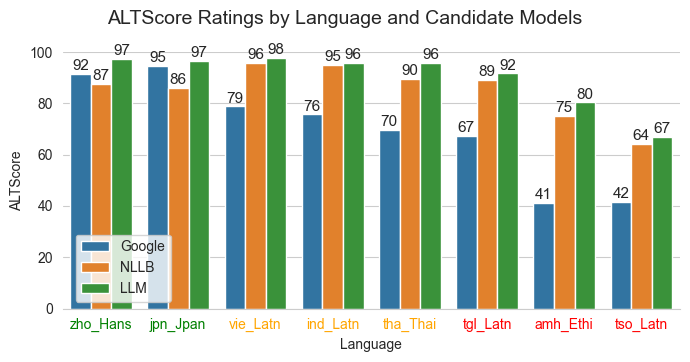

In [142]:
plot_ratings_graph(ratings_df, x="language", y="ALTScore", save_path="../images/altbench_scores.png")